# Pandas

Pandas is the most used library when dealing with data analysis. According to their [website](https://pandas.pydata.org/docs/getting_started/overview.html) Pandas provides fast, flexible and expressive data structurs designed to make working with data both easy and intuitive.

Pandas have two data structures which are the core of the package. Those are `Series` for dealing with one dimensional data and `Data Frames` when dealing with 2d data structures. The best way to think about the Pandas data structures is as flexible containers for lower dimensional data. For example, a DataFrame is a container for Series, and a Series are containers for scalars. 

All pandas data structures are value-mutable objects but not always size-mutable. The length of a Series cannot be changed, but columns an be instarted into a DataFrame. 

# Installing Pandas

To install pandas we simply need to type


In [1]:
! pip install pandas

In [2]:
# And to import pandas
import pandas as pd


## Series 

A series is a one.dimensional labeled array capable of holding any data type. The axis labels are referred to as the index. The simplest way to create a `Series` is to type `s = pd.Series(data,index=index)`. Here `data` can be many things, linke for example a one dimensional NumPy array, a Python list or a dictionary. Let's for example create a `Series` from a NumPy array:

In [4]:
import numpy as np   # import numpy as well

s = pd.Series(np.arange(5),index = ["a", "b", "c", "d", "e"])
print(s)
print(type(s))   # check that it is actually a Series

a    0
b    1
c    2
d    3
e    4
dtype: int32
<class 'pandas.core.series.Series'>


We can also create a `Series` from a `dictionary`. The procedure is the same as before, it is just that the `keys` will be passed as indexs and the `values` as the entries of the `Series`. 

In [5]:
d = {"b": 1, "a": 0, "c": 2}
s = pd.Series(d)
print(s)

b    1
a    0
c    2
dtype: int64


And finally, we can also create a `Series` from a scalar. By default it will only be one value, but we can enlarge it by providing a longer index range.

In [9]:
s = pd.Series(6)
print(s)

# Now with a longer range
s = pd.Series(6,index=np.arange(10))
print(s)

0    6
dtype: int64
0    6
1    6
2    6
3    6
4    6
5    6
6    6
7    6
8    6
9    6
dtype: int64


## Series properties
`Series` act very similary to a `ndarray` and is a valid argument to most NumPy functions. We can for example obtain the index or the values with:

In [10]:
print(s.index) # returns the index of the Series
print(s.values) # retunrs the values

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')
[6 6 6 6 6 6 6 6 6 6]


We can also obtain the total amount of elements from a `Series` using `Series.size` method.

In [11]:
print(s.size)

10


## Indexing Series
There are two ways of accessing `Series` elements. Either using its positional argument or like with Python `dictionaries`, using the index. 

In [12]:
s = pd.Series(np.arange(3),index = ['a','b','c'])
print(s)
print(s[0])    # access using positional argument
print(s['a'])  # access using index

a    0
b    1
c    2
dtype: int32
0
0


Slicing works similar than in NumPy but it will also slice the index. 

In [40]:
s  = pd.Series(np.random.randint(5,10,100))
print(s)
# slice the series
s = s[s>7]
print(s)   # Notice the index now has been also sliced!

0     9
1     9
2     9
3     9
4     7
     ..
95    6
96    5
97    9
98    9
99    7
Length: 100, dtype: int32
0     9
1     9
2     9
3     9
5     8
13    8
14    8
16    9
17    8
19    9
21    9
22    9
26    9
27    9
31    8
36    9
37    9
42    8
43    8
44    9
45    8
51    8
55    9
60    9
61    9
63    9
64    9
65    9
67    8
68    8
70    8
73    8
74    9
75    8
77    8
81    9
82    9
83    8
86    8
87    9
91    9
93    8
97    9
98    9
dtype: int32


Since `Series` and `ndarrays` share similar properties, it is sometimes desirable to transform `Series` to `ndarrays`. For this we use `Series.to_numpy()` method.

In [19]:
s = s.to_numpy()
print(type(s))

<class 'numpy.ndarray'>


## Operations with Series

As with `ndarrays` we can perform some operations. 

### Sum

In [32]:
s1 = pd.Series(np.arange(5,10))
s2 = pd.Series(np.arange(35,40))

# Sum of two series

print(s1+s2)
print(s1.add(s2))    # we can use the .add() method

0    40
1    42
2    44
3    46
4    48
dtype: int32
0    40
1    42
2    44
3    46
4    48
dtype: int32


The `Series.add()` method is very useful in case we have som `NaN` values, since we can specify their new outcome. 

In [34]:
s3 = pd.Series([1,3,4,np.nan,9])
print(s3)

print(s1+s3)   # the outcome is a nan
print(s1.add(s3,fill_value=0))  # we can change it for 0

0    1.0
1    3.0
2    4.0
3    NaN
4    9.0
dtype: float64
0     6.0
1     9.0
2    11.0
3     NaN
4    18.0
dtype: float64
0     6.0
1     9.0
2    11.0
3     8.0
4    18.0
dtype: float64


A key difference between `Series` and `ndarray` is that operations between `Series` automatically align the data based on label. Thus, you can write computations without giving consideration to whether the `Series` involved have the same labels.

In [38]:
print(s[1:]+s[:-1])  # Only sums the values that share the same index

0     NaN
1    12.0
2    14.0
3    16.0
4     NaN
dtype: float64


### Substraction

The idea is the same as before but now using the operator `-` or the method `Series.sub()`.

In [35]:
# Substraction
print(s1-s2)

0   -30
1   -30
2   -30
3   -30
4   -30
dtype: int32


### Multiplication

This is done with the operator `*` or with the method `Series.mul()`.

In [37]:
# Multiplication
print(s1.mul(s3,fill_value=99))

0      5.0
1     18.0
2     28.0
3    792.0
4     81.0
dtype: float64


### Division

It is done with the operator `/` or with the method `Series.div()`.

In [39]:
print(s1/s2)

0    0.142857
1    0.166667
2    0.189189
3    0.210526
4    0.230769
dtype: float64


### NaN Detection
Finally, it is possible to identify NaN values with different tools.

#### isnull()

Will detect the missing values of a Series and returns a Serie of booleans with True or False.

In [41]:
print(s3.isnull())

0    False
1    False
2    False
3     True
4    False
dtype: bool


#### notnull()

Detects the not missing values. It is the oposite to `isnull()`.

In [42]:
print(s3.notnull())

0     True
1     True
2     True
3    False
4     True
dtype: bool


# DataFrame
A `DataFrame` is the main object from the Pandas library. It is a 2-dimensional labeled data structure with coluns of potentially different types. 

Along with the data, you can optionallu pass `index` (row labels) and `columns` (column labels) arguments. If axis labels are not passed, they will be constructed from the input data. We will now review the most common ways of creating `DataFrames`.

## From a Dictionary

Using this method the `keys` become the columns of the `DataFrame`. 

In [44]:
dic = {'a':[1,2],'b':[34,456],'c':[56,65],'d':[23,23]}

df = pd.DataFrame(dic)
print(df)

   a    b   c   d
0  1   34  56  23
1  2  456  65  23


## From a Dictionary of Series

Using this method, the `keys` of the dictionary become the columns of the `DataFrame` and the `index` of the `Series` become the `index` of the `DataFrame`. 

In [46]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}


df = pd.DataFrame(d)
print(df)

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0


We can also specify the index that we want. This will take a subset of the indices on the `Series`. 

In [47]:
print(pd.DataFrame(d, index=["d", "b", "a"]))

   one  two
d  NaN  4.0
b  2.0  2.0
a  1.0  1.0


Finally, we can also specify the columns that we want, even if they do not exist (generating a column of missings). 

In [48]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


## From a NumPy array

In [50]:
array = np.arange(20).reshape((10,2))
pd.DataFrame(array)

,0,1
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9
5,10,11
6,12,13
7,14,15
8,16,17
9,18,19


## From a Dictoinary of NumPy arrays


In [51]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}

pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


We can also introduce index labels if we wish. 

In [52]:
pd.DataFrame(d, index=["a", "b", "c", "d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


## Other Ways

Overall, there are many ways of doing that. For an extensive list visist [here](https://pandas.pydata.org/docs/user_guide/dsintro.html). Some of the remaning ones are from list of dictionaries, from dictionaries of tuples or from series. 

# Working With DataFrames

We have just seen how one can create a `DataFrame` using Python structures. However, in most of the cases we will load a data set from some data in our computer. For the next sections, we will be following the tutorial [here](https://pydataset.readthedocs.io/en/latest/example.html).  

## Loading Data

The first fundamental step for working with data is to load the data into the Python memory. To do that, Pandas has a family of functions, all of them starting by the prefix `read_` which will allow us to open every file format as a `DataFrame`. Just to name a few, with Pandas we can read csv,excel,json,txt,sql,stata and many more. To read a csv file we just need to type `df = pd.read_csv()`. In the same way, to read a Stata `.dta` file we use `pd.read_stata()`. Let's see how it works. 

In [100]:
df = pd.read_csv('Pokemon.csv')   # Load the data as a df. 

We will not review how to open other file format types since the syntaxt is equivalent. 

## Saving Data
In the same way, Python allow us to save data to many different formats using the family of functions that start with `pd.to_`. For example, to save a `DataFrame` to csv we can use `df.to_csv('name.csv')`. If we want to save it to a `.dta` format, we can do  `df.to_stata('name.dta')`. Let's see if we can save the `DataFrame` to a Stata file. 

In [63]:
df.to_stata('Pokemon.dta')

C:\Users\Sergi\anaconda3\lib\site-packages\pandas\io\stata.py:2491: InvalidColumnName: 
Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    #   ->   _
    Type 1   ->   Type_1
    Type 2   ->   Type_2
    Sp. Atk   ->   Sp__Atk
    Sp. Def   ->   Sp__Def

If this is not what you expect, please make sure you have Stata-compliant
column names in your DataFrame (strings only, max 32 characters, only
alphanumerics and underscores, no Stata reserved words)

  warnings.warn(ws, InvalidColumnName)


Like with loading the data, the syntaxt for all the other formats is the same and for this reason we will not review it. Just one comment. Python will save the index of the DataFrame as a new column in the data file that we are saving. If we want to avoid that, we need to set the index as `False`. 

In [59]:
df.to_stata('Pokemon.dta',write_index=False)

C:\Users\Sergi\anaconda3\lib\site-packages\pandas\io\stata.py:2491: InvalidColumnName: 
Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    #   ->   _
    Type 1   ->   Type_1
    Type 2   ->   Type_2
    Sp. Atk   ->   Sp__Atk
    Sp. Def   ->   Sp__Def

If this is not what you expect, please make sure you have Stata-compliant
column names in your DataFrame (strings only, max 32 characters, only
alphanumerics and underscores, no Stata reserved words)

  warnings.warn(ws, InvalidColumnName)


## Exploration Methods
Once we have loaded our data set, we usually want to explore it a little bit, before getting into any type of analysis. The first thing we might want to do is to see wether the data is actually loaded, and how does it look. 

In [64]:
print(df)   # prints the data frame

       #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generatio

### df.head() 

A more convenient way of exploring our newly created `DataFrame` is by using the `head()` method that will allow us to explore the first number of rows that we want. 

df.head(5)  # display the first 5 rows

### df.tail()

Equivalently, we can display the last amount of rows that we want. Notice that the column names will still appear. 

In [66]:
df.tail(3)  # display the last 3 rows

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


### df.sample()

If we don't trust the first or the last rows, we can still display a random sample of our data with the amount of rows that we want.

In [67]:
df.sample(6)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
302,279,Pelipper,Water,Flying,430,60,50,100,85,70,65,3,False
433,388,Grotle,Grass,NaN,405,75,89,85,55,65,36,4,False
439,394,Prinplup,Water,NaN,405,64,66,68,81,76,50,4,False
210,195,Quagsire,Water,Ground,430,95,85,85,65,65,35,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
282,260,Swampert,Water,Ground,535,100,110,90,85,90,60,3,False


By taking a look at the index, we can see that the rows are totally random, and also they are unordered. 

### df.shape

If we are willing to learn the number of rows and columns our `DataFrame` has. 

In [69]:
df.shape   #(rows,columns)

(800, 13)

### df.dtypes
It will tell us the type of each of the variables of our `DataFrame`. 

In [71]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

### df.columns

Suppose we are only interested in the column names of our `DataFrame`. 

In [73]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

### df.describe()

This will return a `DataFrame` with the summary statistics from our numeric columns. 

In [74]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### df.info()

Will return a little summary of our `DataFrame`.

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### df.unique()

Suppose we are interested in the unique elements of a Python column. We can then use the `df.unique()` method to return only the unique elements. 

In [76]:
df['Generation'].unique()   

array([1, 2, 3, 4, 5, 6], dtype=int64)

Notice that to refer to a particular `DataFrame` column we are using the column name. We can also subset based on rows.

In [78]:
df['Generation'][:6] # First 6 rows from column generation

0    1
1    1
2    1
3    1
4    1
5    1
Name: Generation, dtype: int64

### df.value_counts()

It returns a `Serie` with the unique values and the amount of times that they appear. 


In [79]:
df['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

### df.isnull()

We can check with observations are missing in our `DataFrame`. Will return `True` if missing and `False` if not. 

In [ ]:
df.isnull()

To make it easier to understand, we can summarize the result from `isnull()` to see the amount of missing observations at every column. 

In [82]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

## Indexing and Slicing DataFrames

Pandas offer a lot of opportunities to index and slice their main object, `DataFrames`. The main object to do that are `loc` and `iloc`. The main differences are that: 
<ul>
    <li> <b> loc </b> is label-based, which means that you have to specify rows and columns based on their row and columb labels. </li>
    <li> <b> iloc </b> is integer position-based, so you have to specify rows and columns based by their integer position values.
</ul>

So illustrate how they work let us estalish a different index in our `DataFrame`. To do that we will use the module `set_index()`. 

In [101]:
df.set_index('Name',inplace=True)
df.head(3)

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False


Now the index corresponds with the name of the Pokemon.

### Locate a column

The easiest way to refer to a column is just using its name. We do not need to use `iloc` or `loc`, we can just type `df['colname']`. 

In [102]:
print(df['Type 1'])

Name
Bulbasaur                  Grass
Ivysaur                    Grass
Venusaur                   Grass
VenusaurMega Venusaur      Grass
Charmander                  Fire
                          ...   
Diancie                     Rock
DiancieMega Diancie         Rock
HoopaHoopa Confined      Psychic
HoopaHoopa Unbound       Psychic
Volcanion                   Fire
Name: Type 1, Length: 800, dtype: object


In [104]:
print(df.loc[:,'Type 1'])  # Locate using loc

Name
Bulbasaur                  Grass
Ivysaur                    Grass
Venusaur                   Grass
VenusaurMega Venusaur      Grass
Charmander                  Fire
                          ...   
Diancie                     Rock
DiancieMega Diancie         Rock
HoopaHoopa Confined      Psychic
HoopaHoopa Unbound       Psychic
Volcanion                   Fire
Name: Type 1, Length: 800, dtype: object


In [103]:
print(df.iloc[:,2])  # locate using iloc

Name
Bulbasaur                Poison
Ivysaur                  Poison
Venusaur                 Poison
VenusaurMega Venusaur    Poison
Charmander                  NaN
                          ...  
Diancie                   Fairy
DiancieMega Diancie       Fairy
HoopaHoopa Confined       Ghost
HoopaHoopa Unbound         Dark
Volcanion                 Water
Name: Type 2, Length: 800, dtype: object


### Locate multiple Columns
To do that we can do:

In [111]:
print(df[['Type 1','Type 2']])

                        Type 1  Type 2
Name                                  
Bulbasaur                Grass  Poison
Ivysaur                  Grass  Poison
Venusaur                 Grass  Poison
VenusaurMega Venusaur    Grass  Poison
Charmander                Fire     NaN
...                        ...     ...
Diancie                   Rock   Fairy
DiancieMega Diancie       Rock   Fairy
HoopaHoopa Confined    Psychic   Ghost
HoopaHoopa Unbound     Psychic    Dark
Volcanion                 Fire   Water

[800 rows x 2 columns]


Or we can use the `iloc` and the `loc` commands.

In [114]:
df.loc[:,['Type 1','Type 2']]

,Type 1,Type 2
Name,,
Bulbasaur,Grass,Poison
Ivysaur,Grass,Poison
Venusaur,Grass,Poison
VenusaurMega Venusaur,Grass,Poison
Charmander,Fire,NaN
...,...,...
Diancie,Rock,Fairy
DiancieMega Diancie,Rock,Fairy
HoopaHoopa Confined,Psychic,Ghost


In [116]:
df.iloc[:,[1,2]]

,Type 1,Type 2
Name,,
Bulbasaur,Grass,Poison
Ivysaur,Grass,Poison
Venusaur,Grass,Poison
VenusaurMega Venusaur,Grass,Poison
Charmander,Fire,NaN
...,...,...
Diancie,Rock,Fairy
DiancieMega Diancie,Rock,Fairy
HoopaHoopa Confined,Psychic,Ghost


### Locate a row

To locate a row or a slice of rows we can only use `iloc` or `loc`. 

In [105]:
df.iloc[2:6]   # locate the rows 2 to 5. 

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False


In [109]:
df.loc['Venusaur':'Charmeleon'] # locate the rows 2 to 5

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False


Notice here we can spot an important difference among the two methods. If we want to select rows two to five, when using `iloc` we specify the interval `[2:6]` since row `6` is the first element that is <b> not </b> included. However, when locating the same interval using `loc` we specify `['Venusaur':'Charmeleon']` since `Charmeleon` is the last <b> included </b> element. 

## Locate Rows and Columns

In [117]:
df.iloc[1,[2,3]]   # row 1, columns 2 and 3

Type 2    Poison
Total        405
Name: Ivysaur, dtype: object

In [119]:
df.loc['Ivysaur',['Type 2','Total']]  # row 1, columns 2 and 3

Type 2    Poison
Total        405
Name: Ivysaur, dtype: object

Finally, we can also locate an specific element.

In [120]:
df.loc['Ivysaur','Type 2']

'Poison'

In [121]:
df.iloc[1,2]

'Poison'

## Slicing based on logical conditions

We can also apply logical conditions to get slices from the `DataFrame` object. 

### One condition

In [129]:
# using the loc method
df.loc[df['Type 2'] == 'Water']

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Omanyte,138,Rock,Water,355,35,40,100,90,55,35,1,False
Omastar,139,Rock,Water,495,70,60,125,115,70,55,1,False
Kabuto,140,Rock,Water,355,30,80,90,55,45,55,1,False
Kabutops,141,Rock,Water,495,60,115,105,65,70,80,1,False
Surskit,283,Bug,Water,269,40,30,32,50,52,65,3,False
Spheal,363,Ice,Water,290,70,40,50,55,50,25,3,False
Sealeo,364,Ice,Water,410,90,60,70,75,70,45,3,False
Walrein,365,Ice,Water,530,110,80,90,95,90,65,3,False
Bibarel,400,Normal,Water,410,79,85,60,55,60,71,4,False


In [128]:
df[df['Type 2'] == 'Water']

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Omanyte,138,Rock,Water,355,35,40,100,90,55,35,1,False
Omastar,139,Rock,Water,495,70,60,125,115,70,55,1,False
Kabuto,140,Rock,Water,355,30,80,90,55,45,55,1,False
Kabutops,141,Rock,Water,495,60,115,105,65,70,80,1,False
Surskit,283,Bug,Water,269,40,30,32,50,52,65,3,False
Spheal,363,Ice,Water,290,70,40,50,55,50,25,3,False
Sealeo,364,Ice,Water,410,90,60,70,75,70,45,3,False
Walrein,365,Ice,Water,530,110,80,90,95,90,65,3,False
Bibarel,400,Normal,Water,410,79,85,60,55,60,71,4,False


## Multiple Conditions
We can also filter based on multiple conditions. Those can be for the same column or for different ones. 

In [131]:
df.loc[(df['Type 1'] == 'Water') | (df['Type 1'] == 'Fire')]

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
CharizardMega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
CharizardMega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Litleo,667,Fire,Normal,369,62,50,58,73,54,72,6,False
Pyroar,668,Fire,Normal,507,86,68,72,109,66,106,6,False
Clauncher,692,Water,NaN,330,50,53,62,58,63,44,6,False


Importantly, when filtering in `DataFrames` based on multiple conditions we will use the `&` rather than the `and` or the `|` rather than the `or`.

In [135]:
# We can condition on two different columns

df.loc[(df['Type 1'] == 'Fire') & (df['Attack']>100)]

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
CharizardMega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
CharizardMega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False
Arcanine,59,Fire,NaN,555,90,110,80,100,80,95,1,False
Flareon,136,Fire,NaN,525,65,130,60,95,110,65,1,False
Entei,244,Fire,NaN,580,115,115,85,90,75,100,2,True
Ho-oh,250,Fire,Flying,680,106,130,90,110,154,90,2,True
Blaziken,257,Fire,Fighting,530,80,120,70,110,70,80,3,False
BlazikenMega Blaziken,257,Fire,Fighting,630,80,160,80,130,80,100,3,False
CameruptMega Camerupt,323,Fire,Ground,560,70,120,100,145,105,20,3,False


Notice we can include as much conditions as we want. 

In [136]:
df.loc[(df['Type 1'] == 'Water') & (df['Attack']>100) & (df['Speed'] >80)]

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Gyarados,130,Water,Flying,540,95,125,79,60,100,81,1,False
GyaradosMega Gyarados,130,Water,Dark,640,95,155,109,70,130,81,1,False
Sharpedo,319,Water,Dark,460,70,120,40,95,40,95,3,False
SharpedoMega Sharpedo,319,Water,Dark,560,70,140,70,110,65,105,3,False
KyogrePrimal Kyogre,382,Water,NaN,770,100,150,90,180,160,90,3,True
Floatzel,419,Water,NaN,495,85,105,55,85,50,115,4,False
Palkia,484,Water,Dragon,680,90,120,100,150,120,100,4,True


### Filtering using pandas specific methods

#### df.isin()
It allows to filter based on wether a column contains values that we specify. 

In [177]:
df[df['Type 1'].isin(['Ice','Grass'])]

,index,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,New Column,Total Without HP,Sum
Name,,,,,,,,,,,,,,,,
Bulbasaur,0,1,Grass,Poison,1.590,45,0,49,65,65,45,1,True,5,273,143
Oddish,48,43,Grass,Poison,1.600,45,0,55,75,65,30,1,True,5,275,150
Gloom,49,44,Grass,Poison,1.975,60,0,70,85,75,40,1,True,5,335,195
Bellsprout,75,69,Grass,Poison,1.500,50,0,35,70,30,40,1,True,5,250,160
Weepinbell,76,70,Grass,Poison,1.950,65,0,50,85,45,55,1,True,5,325,205
Exeggcute,110,102,Grass,Psychic,1.625,60,0,80,60,45,40,1,False,5,265,180
Chikorita,166,152,Grass,NaN,1.590,45,0,65,49,65,45,2,False,5,273,159
Hoppip,202,187,Grass,Flying,1.250,35,0,40,35,55,50,2,False,5,215,110
Skiploom,203,188,Grass,Flying,1.700,55,0,50,45,65,80,2,False,5,285,150


## Iterating through Rows

We can also iterate though each row using the `interrows()` method.

In [139]:
for index,row in df[:5].iterrows():   # only first 4 rows
    print(index,row)

Bulbasaur #                  1
Type 1         Grass
Type 2        Poison
Total            318
HP                45
Attack            49
Defense           49
Sp. Atk           65
Sp. Def           65
Speed             45
Generation         1
Legendary      False
Name: Bulbasaur, dtype: object
Ivysaur #                  2
Type 1         Grass
Type 2        Poison
Total            405
HP                60
Attack            62
Defense           63
Sp. Atk           80
Sp. Def           80
Speed             60
Generation         1
Legendary      False
Name: Ivysaur, dtype: object
Venusaur #                  3
Type 1         Grass
Type 2        Poison
Total            525
HP                80
Attack            82
Defense           83
Sp. Atk          100
Sp. Def          100
Speed             80
Generation         1
Legendary      False
Name: Venusaur, dtype: object
VenusaurMega Venusaur #                  3
Type 1         Grass
Type 2        Poison
Total            625
HP                80


## Modifying Characteristics

Until now, we have just seen methods and techniques to visualize different aspects of the `DataFrame`. But what if we want to make some changes? In this section we will first review some of the built-in methods to modify characteristics and later we will take a look at column creation and modification. 

### Methods to modify features

The first important thing we might want to do, and we have already done in our data frame, is to set a variable as an index.

#### df.set_index()

Allows to change the index of the `DataFrame`. A very important characteristics is that index do not need to uniquely identify each row. Furthermore, we can set multiple variables as our index.

In [141]:
df.set_index('Type 2') # set type 2 as the index.

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 2,,,,,,,,,,,,
Poison,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
Poison,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
Poison,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
Poison,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
NaN,4,Charmander,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Fairy,719,Diancie,Rock,600,50,100,150,100,150,50,6,True
Fairy,719,DiancieMega Diancie,Rock,700,50,160,110,160,110,110,6,True
Ghost,720,HoopaHoopa Confined,Psychic,600,80,110,60,150,130,70,6,True


In [142]:
df.set_index(['Name','Type 1'])   # Set multiple variables as our index. 

,,#,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,Type 1,,,,,,,,,,,
Bulbasaur,Grass,1,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,2,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,3,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,Grass,3,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,4,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,Rock,719,Fairy,600,50,100,150,100,150,50,6,True
DiancieMega Diancie,Rock,719,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,Psychic,720,Ghost,600,80,110,60,150,130,70,6,True


Notice however, that we are creating an object, but not changing the original `DataFrame`. If we want to change the orinigal `DataFrame` we need to use the `inplace` argument.

In [149]:
print(df.head(5))
df.set_index(['Name'],inplace=True)
print(df.head(5))

   index                   Name  # Type 1  Type 2  Total  HP  Attack  Defense  \
0      0              Bulbasaur  1  Grass  Poison    318  45      49       49   
1      1                Ivysaur  2  Grass  Poison    405  60      62       63   
2      2               Venusaur  3  Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur  3  Grass  Poison    625  80     100      123   
4      4             Charmander  4   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  
                       index  # Type 1  Type 2  Total  HP  Attack  Defense  \
Name                                                                         
Bulbasaur                  0  1  Grass  Poiso

#### df.reset_index()

We can also remove the index we have established and go back to the initial configuration. 

In [148]:
df.reset_index(inplace=True)
print(df.head(3))

   index       Name  # Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
0      0  Bulbasaur  1  Grass  Poison    318  45      49       49       65   
1      1    Ivysaur  2  Grass  Poison    405  60      62       63       80   
2      2   Venusaur  3  Grass  Poison    525  80      82       83      100   

   Sp. Def  Speed  Generation  Legendary  
0       65     45           1      False  
1       80     60           1      False  
2      100     80           1      False  


#### df.rename()

It will allow us to change the column names. It takes a dictionary as an input.  

In [150]:
df.rename(columns={'Attack':'Strength'},inplace=True)
df.head(2)

,index,#,Type 1,Type 2,Total,HP,Strength,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,,
Bulbasaur,0,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,1,2,Grass,Poison,405,60,62,63,80,80,60,1,False


In [151]:
df.rename(columns={'Strength':'Attack'},inplace=True)   # Change it back


#### df.sort_values()

It will sort the `DataFrame` based on one or multiple columns according to the numerical or alphabetical order. 

In [153]:
df.sort_values('Type 1')  

,index,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,,
Sewaddle,600,540,Bug,Grass,310,45,53,70,40,60,42,5,False
Pinsir,136,127,Bug,NaN,500,65,125,100,55,70,85,1,False
Burmy,457,412,Bug,NaN,224,40,29,45,29,45,36,4,False
Scyther,132,123,Bug,Flying,500,70,110,80,55,80,105,1,False
Joltik,656,595,Bug,Electric,319,50,47,50,57,50,65,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Totodile,172,158,Water,NaN,314,50,65,64,44,48,43,2,False
Basculin,610,550,Water,NaN,460,70,92,65,80,55,98,5,False
Vaporeon,145,134,Water,NaN,525,130,65,60,110,95,65,1,False


We can also reverse the order by using the argument `ascending = False`. 

In [154]:
df.sort_values('Speed',ascending =False)

,index,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,,
DeoxysSpeed Forme,431,386,Psychic,NaN,600,50,95,90,95,90,180,3,True
Ninjask,315,291,Bug,Flying,456,61,90,45,50,50,160,3,False
DeoxysNormal Forme,428,386,Psychic,NaN,600,50,150,50,150,50,150,3,True
AerodactylMega Aerodactyl,154,142,Rock,Flying,615,80,135,85,70,95,150,1,False
AlakazamMega Alakazam,71,65,Psychic,NaN,590,55,50,65,175,95,150,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ferroseed,658,597,Grass,Steel,305,44,50,91,24,86,10,5,False
Bonsly,486,438,Rock,NaN,290,50,80,95,10,45,10,4,False
Trapinch,359,328,Ground,NaN,290,45,100,45,45,45,10,3,False


In [155]:
#Sort based on multiple columns

df.sort_values(['Attack','Defense'], ascending = [True,False])  # First ascending, second descending

,index,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,,
Chansey,121,113,Normal,NaN,450,250,5,5,35,105,50,1,False
Happiny,488,440,Normal,NaN,220,100,5,5,15,65,30,4,False
Shuckle,230,213,Bug,Rock,505,20,10,230,10,230,5,2,False
Magikarp,139,129,Water,NaN,200,20,10,55,15,20,80,1,False
Blissey,261,242,Normal,NaN,540,255,10,10,75,135,55,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
GroudonPrimal Groudon,424,383,Ground,Fire,770,100,180,160,150,90,90,3,True
RayquazaMega Rayquaza,426,384,Dragon,Flying,780,105,180,100,180,100,115,3,True
DeoxysAttack Forme,429,386,Psychic,NaN,600,50,180,20,180,20,150,3,True


#### df.drop()

It allows to delete a particular row or column.

In [158]:
df.drop(['Type 2'],axis=1)   # delete variable 'Type 2'

,index,#,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,0,1,Grass,318,45,49,49,65,65,45,1,False
Ivysaur,1,2,Grass,405,60,62,63,80,80,60,1,False
Venusaur,2,3,Grass,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,3,Grass,625,80,100,123,122,120,80,1,False
Charmander,4,4,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,795,719,Rock,600,50,100,150,100,150,50,6,True
DiancieMega Diancie,796,719,Rock,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,797,720,Psychic,600,80,110,60,150,130,70,6,True


In [159]:
df.drop(['Bulbasaur'],axis=0)  # delete the first row

,index,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,,
Ivysaur,1,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,2,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,5,Fire,NaN,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,795,719,Rock,Fairy,600,50,100,150,100,150,50,6,True
DiancieMega Diancie,796,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,797,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True


### Creating new columns and modiying existing ones

To create a new column we just need to type `df['newcol'] = ` and then set the column equal to whathever we want. This can be a `Series` , a scalar or a combination of other columns of the `DataFrame`. 

In [160]:
# Creating a new column equal to scalar
df['New Column'] = 5
df.head(3)

,index,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,New Column
Name,,,,,,,,,,,,,,
Bulbasaur,0,1,Grass,Poison,318,45,49,49,65,65,45,1,False,5
Ivysaur,1,2,Grass,Poison,405,60,62,63,80,80,60,1,False,5
Venusaur,2,3,Grass,Poison,525,80,82,83,100,100,80,1,False,5


In [162]:
# Creating a new column equal to a combination of other columns

df['Total Without HP'] = df['Total'] - df['HP']
df.head(3)

,index,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,New Column,Total Without HP
Name,,,,,,,,,,,,,,,
Bulbasaur,0,1,Grass,Poison,318,45,49,49,65,65,45,1,False,5,273
Ivysaur,1,2,Grass,Poison,405,60,62,63,80,80,60,1,False,5,345
Venusaur,2,3,Grass,Poison,525,80,82,83,100,100,80,1,False,5,445


In [164]:
# We can also sum multiple columns to create a new column
df['Sum'] = df.iloc[:,5:8].sum(axis=1)   # sum across columns
df.head(3)

,index,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,New Column,Total Without HP,Sum
Name,,,,,,,,,,,,,,,,
Bulbasaur,0,1,Grass,Poison,318,45,49,49,65,65,45,1,False,5,273,143
Ivysaur,1,2,Grass,Poison,405,60,62,63,80,80,60,1,False,5,345,185
Venusaur,2,3,Grass,Poison,525,80,82,83,100,100,80,1,False,5,445,245


We can even modify an already existing column. 

In [165]:
df['Total'] = df['Total'] / 200
df.head(3)

,index,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,New Column,Total Without HP,Sum
Name,,,,,,,,,,,,,,,,
Bulbasaur,0,1,Grass,Poison,1.590,45,49,49,65,65,45,1,False,5,273,143
Ivysaur,1,2,Grass,Poison,2.025,60,62,63,80,80,60,1,False,5,345,185
Venusaur,2,3,Grass,Poison,2.625,80,82,83,100,100,80,1,False,5,445,245


## Conditional Changes

This will allow us to change the values of some variables based on the values of another variables. 

### Change one variable based on itself.

In [167]:
df.loc[df['Type 1'] == 'Water','Type 1'] = 'Wet'
df['Type 1'].unique()

array(['Grass', 'Fire', 'Wet', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

### Change one variable based on another.


In [169]:
df.loc[df['Type 1'] == 'Fire','Total'] = 999
df.head(6)

,index,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,New Column,Total Without HP,Sum
Name,,,,,,,,,,,,,,,,
Bulbasaur,0,1,Grass,Poison,1.590,45,49,49,65,65,45,1,False,5,273,143
Ivysaur,1,2,Grass,Poison,2.025,60,62,63,80,80,60,1,False,5,345,185
Venusaur,2,3,Grass,Poison,2.625,80,82,83,100,100,80,1,False,5,445,245
VenusaurMega Venusaur,3,3,Grass,Poison,3.125,80,100,123,122,120,80,1,False,5,545,303
Charmander,4,4,Fire,NaN,999.000,39,52,43,60,50,65,1,False,5,270,134
Charmeleon,5,5,Fire,NaN,999.000,58,64,58,80,65,80,1,False,5,347,180


### Change one variable based on multiple conditions


In [172]:
df.loc[(df['Attack']>60) & (df['Attack']<1000),'Attack'] = 0 
df.head(6)

,index,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,New Column,Total Without HP,Sum
Name,,,,,,,,,,,,,,,,
Bulbasaur,0,1,Grass,Poison,1.590,45,0,49,65,65,45,1,False,5,273,143
Ivysaur,1,2,Grass,Poison,2.025,60,0,63,80,80,60,1,False,5,345,185
Venusaur,2,3,Grass,Poison,2.625,80,0,83,100,100,80,1,False,5,445,245
VenusaurMega Venusaur,3,3,Grass,Poison,3.125,80,0,123,122,120,80,1,False,5,545,303
Charmander,4,4,Fire,NaN,999.000,39,0,43,60,50,65,1,False,5,270,134
Charmeleon,5,5,Fire,NaN,999.000,58,0,58,80,65,80,1,False,5,347,180


In [174]:
df.loc[(df['Type 2']=='Poison') & (df['Type 1'] == 'Grass'), 'Legendary'] = 'True'
df.head(5)

,index,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,New Column,Total Without HP,Sum
Name,,,,,,,,,,,,,,,,
Bulbasaur,0,1,Grass,Poison,1.590,45,0,49,65,65,45,1,True,5,273,143
Ivysaur,1,2,Grass,Poison,2.025,60,0,63,80,80,60,1,True,5,345,185
Venusaur,2,3,Grass,Poison,2.625,80,0,83,100,100,80,1,True,5,445,245
VenusaurMega Venusaur,3,3,Grass,Poison,3.125,80,0,123,122,120,80,1,True,5,545,303
Charmander,4,4,Fire,NaN,999.000,39,0,43,60,50,65,1,False,5,270,134


### Modify multiple columns simultaneously. 

It is also possible to change the value of multiple columns based on the first logical condition. 

In [175]:
df.loc[df['Total']>2,['Generation','Type 1']] = ['Best','Economist']
df.head(5)

,index,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,New Column,Total Without HP,Sum
Name,,,,,,,,,,,,,,,,
Bulbasaur,0,1,Grass,Poison,1.590,45,0,49,65,65,45,1,True,5,273,143
Ivysaur,1,2,Economist,Poison,2.025,60,0,63,80,80,60,Best,True,5,345,185
Venusaur,2,3,Economist,Poison,2.625,80,0,83,100,100,80,Best,True,5,445,245
VenusaurMega Venusaur,3,3,Economist,Poison,3.125,80,0,123,122,120,80,Best,True,5,545,303
Charmander,4,4,Economist,NaN,999.000,39,0,43,60,50,65,Best,False,5,270,134


## Conditional Changes using NumPy

We can also use NumPy methods to apply conditional changes to our `DataFrame`. 

### np.where()

It will allow us to change the elements that satisfy a particular condition, with the peculiarity that we can also change those elements that do not satisfy the condition.  For example, suppose we want to change the *Defense* column elements, and instead of numbers just include 'good defense' and 'bad defense'. 

In [180]:
df['Defense'] = np.where(df['Defense'] > 80, 'Good defense','Bad defense')

TypeError: '>' not supported between instances of 'str' and 'int'

In [181]:
df.head(5)

,index,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,New Column,Total Without HP,Sum
Name,,,,,,,,,,,,,,,,
Bulbasaur,0,1,Grass,Poison,1.590,45,0,Bad defense,65,65,45,1,True,5,273,143
Ivysaur,1,2,Economist,Poison,2.025,60,0,Bad defense,80,80,60,Best,True,5,345,185
Venusaur,2,3,Economist,Poison,2.625,80,0,Good defense,100,100,80,Best,True,5,445,245
VenusaurMega Venusaur,3,3,Economist,Poison,3.125,80,0,Good defense,122,120,80,Best,True,5,545,303
Charmander,4,4,Economist,NaN,999.000,39,0,Bad defense,60,50,65,Best,False,5,270,134


### np.select()

It expands the opportunities of `np.where()` since it allows to include more than one conditon. The syntaxt is `np.select(conditions,options)`. Let's see an example:

In [183]:
conditions = [df['Type 1'] == 'Grass',df['Total'] > 2]
options = ['Red','White']

df['New Column'] = np.select(conditions,options)
df.head(4)

,index,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,New Column,Total Without HP,Sum
Name,,,,,,,,,,,,,,,,
Bulbasaur,0,1,Grass,Poison,1.590,45,0,Bad defense,65,65,45,1,True,Red,273,143
Ivysaur,1,2,Economist,Poison,2.025,60,0,Bad defense,80,80,60,Best,True,White,345,185
Venusaur,2,3,Economist,Poison,2.625,80,0,Good defense,100,100,80,Best,True,White,445,245
VenusaurMega Venusaur,3,3,Economist,Poison,3.125,80,0,Good defense,122,120,80,Best,True,White,545,303


## Merge,Concat and Join

Pandas provides various facilities for easily combining together Series or DataFrame with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations. All this section is obtained from Pandas documentation, for more information visit their [site](https://pandas.pydata.org/docs/user_guide/merging.html).

## concat()

This is the function that we wil use whenever we have two or more `DataFrames` and we want to concatenate columns or rows from one `DataFrame` to another. Importantly, `concat()` allow us to concatenate in both axis, so we can either add more rows or more columns. 

Let's first see a simple example:


In [ ]:
In [1]: df1 = pd.DataFrame(
   ...:     {
   ...:         "A": ["A0", "A1", "A2", "A3"],
   ...:         "B": ["B0", "B1", "B2", "B3"],
   ...:         "C": ["C0", "C1", "C2", "C3"],
   ...:         "D": ["D0", "D1", "D2", "D3"],
   ...:     },
   ...:     index=[0, 1, 2, 3],
   ...: )
   ...: 

In [2]: df2 = pd.DataFrame(
   ...:     {
   ...:         "A": ["A4", "A5", "A6", "A7"],
   ...:         "B": ["B4", "B5", "B6", "B7"],
   ...:         "C": ["C4", "C5", "C6", "C7"],
   ...:         "D": ["D4", "D5", "D6", "D7"],
   ...:     },
   ...:     index=[4, 5, 6, 7],
   ...: )
   ...: 

In [3]: df3 = pd.DataFrame(
   ...:     {
   ...:         "A": ["A8", "A9", "A10", "A11"],
   ...:         "B": ["B8", "B9", "B10", "B11"],
   ...:         "C": ["C8", "C9", "C10", "C11"],
   ...:         "D": ["D8", "D9", "D10", "D11"],
   ...:     },
   ...:     index=[8, 9, 10, 11],
   ...: )
   ...: 

In [4]: frames = [df1, df2, df3]

In [5]: result = pd.concat(frames)

The result of this operation is: 

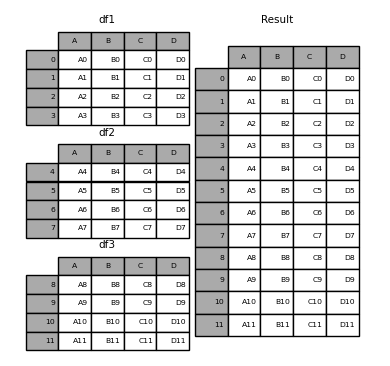

Since all of the `DataFrames` have the same column names and different index values. Suppose we want to include an index to remember from which `DataFrame` each row comes from. We can do that using the `keys` argument:

In [185]:
result = pd.concat(frames, keys=["x", "y", "z"])

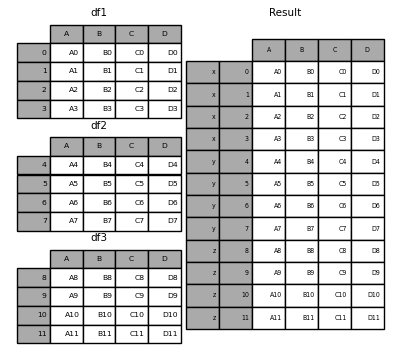

### Set logic on the other axes
Until now we have concatenated based on the rows. We can also concatenate based on the columns. Furthermore, we can specfy how to handle the axes that are not being concatenated. There are two options: 
<ul>
    <li> <b> join = 'outer' </b> : This will take the union of all of them, resulting in zero infromation loss. </li>
    <li> <b> join = 'inner' </b> : This will take the intersection, with the information loss that this implies </li>
</ul>
    
Let's see an example:  

In [187]:
df4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
    },
    index=[2, 3, 6, 7],
)

result = pd.concat([df1, df4], axis=1, join ='outer')
print(result)

     A    B    C    D    B    D    F
0   A0   B0   C0   D0  NaN  NaN  NaN
1   A1   B1   C1   D1  NaN  NaN  NaN
2   A2   B2   C2   D2   B2   D2   F2
3   A3   B3   C3   D3   B3   D3   F3
6  NaN  NaN  NaN  NaN   B6   D6   F6
7  NaN  NaN  NaN  NaN   B7   D7   F7


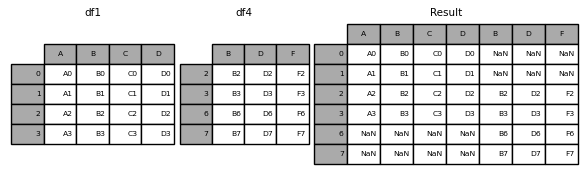

We can also do it with `inner`. 

In [188]:
result = pd.concat([df1, df4], axis=1, join="inner")
print(result)

    A   B   C   D   B   D   F
2  A2  B2  C2  D2  B2  D2  F2
3  A3  B3  C3  D3  B3  D3  F3


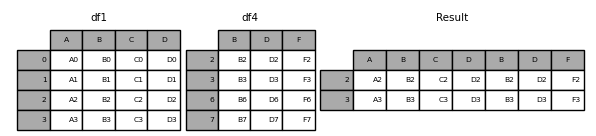

Notice that we are concatenating columns, and we are keeping or not rows based on wether they are common across `DataFrames`. 

We can also rename the index from the second `DataFrame` as the first:

In [191]:
pd.concat([df1, df4.reindex(df1.index)], axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


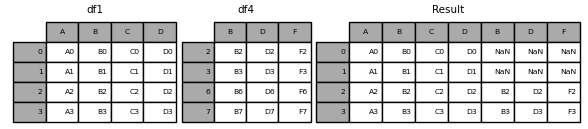

### Ignoring indexes on the concatenation axis


In [193]:
result = pd.concat([df1, df4], ignore_index=True, sort=False)
result.head(3)

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN


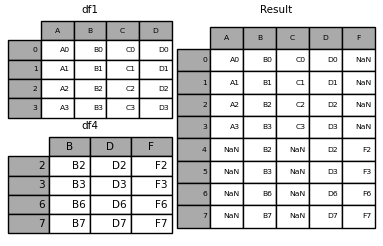

### Appending rows to a DataFrame
We can also append a `Series` as a row to our `DataFrame`. 

In [194]:
s2 = pd.Series(["X0", "X1", "X2", "X3"], index=["A", "B", "C", "D"])

result = pd.concat([df1, s2.to_frame().T], ignore_index=True)

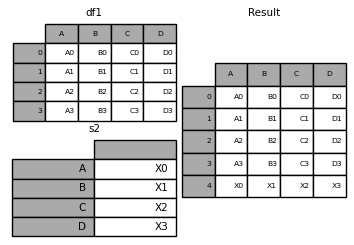

## merge()

It is the most common way of including new columns to a `DataFrame` based in some standard conditions. It is the entry point for all standard database join operations. There are several cases to consider: 
<ul>
    <li> <b> one-to-one </b>: when joininig two `DataFrame`objects on their indexes (which must contain unique values). </li>
    <li> <b> many-to-one </b> : when joining an index (unique) to one or more column is a different `DataFrame`. </li>
    <li> <b> many-to-many </b>: joining columns on columns. </li>
</ul>

The most important element doing the merge is the `key` which is the identifier on which we are going to merge. To specify which type of merge we are going to do we use the argument `how`. It specifies how to determine which keys are to be included in the resulting table. The options are:
<ul>
    <li> <b> left </b> : Use keys from left frame only. </li>
    <li> <b> right </b> : Uses keys from right frame only. </li>
    <li> <b> outer </b> : Use union of keys from both frames. </li>
    <li> <b> inner </b> : USe intersection of keys from both frames </li>
    <li> <b> cross </b> : Create the cartesian product of rows of both frames. </li>
</ul>

Let's see an example:

In [195]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

result = pd.merge(left, right, on="key")
result.head(2)

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1


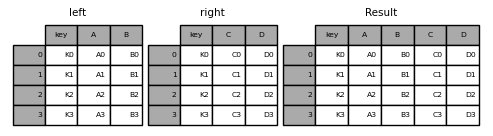

On the prevoius code we are merging `on="key`, which basically means `key`is our identifyer to do the merge. Furthermore, since we are not specifying the default is `how="inner"` which means we are using the intersection of the values of the variable `key`. Since in this case both `DataFrames` have the same values for the column `key`, this is trivial. We can also merge on two `keys`.

In [196]:
left = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

right = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

result = pd.merge(left, right, on=["key1", "key2"])
result.head(2)


,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1


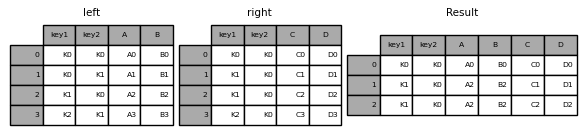

Notice since by default we are using `how = "inner"` we are only taking the combinations of `key1`and `key2` that are common across `DataFrames`. The others are being dropped.

### Left merge

It merges on the same index across `DataFrames` which is specified by `on="XXX"` but it only considers the values of the index that appear on the `left` `DataFrame`. 

In [197]:
result = pd.merge(left, right, how="left", on=["key1", "key2"])

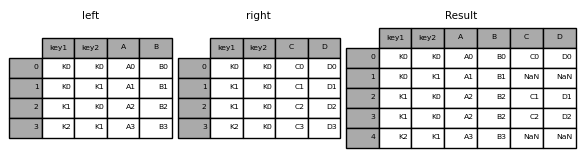

### Right merge


In [198]:
result = pd.merge(left, right, how="right", on=["key1", "key2"])


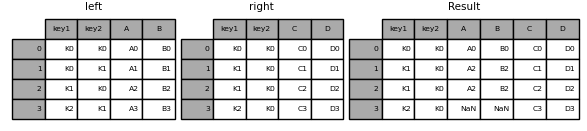

### Outer merge

In [199]:
result = pd.merge(left, right, how="outer", on=["key1", "key2"])

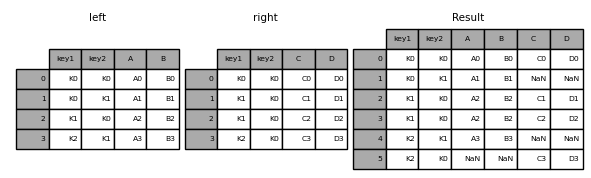

### Cross merge

In [200]:
result = pd.merge(left, right, how="cross")

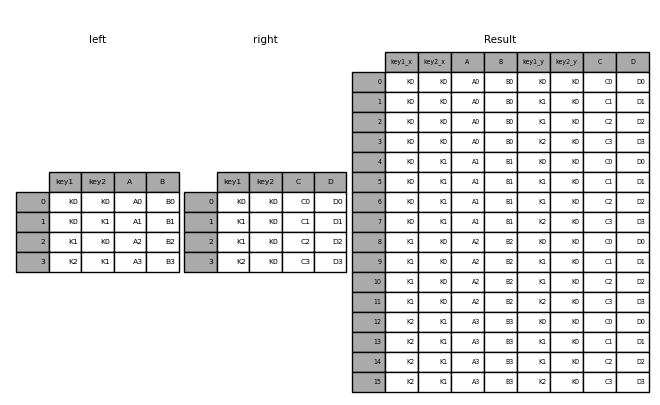

## Checking for duplicate keys

Users can use the `validate` argument to automatically check whether there are unexpected duplicates in their merge keys. Checking key uniqueness is also a good way to ensure user data structures are as expected.

In [201]:
left = pd.DataFrame({"A": [1, 2], "B": [1, 2]})
right = pd.DataFrame({"A": [4, 5, 6], "B": [2, 2, 2]})

result = pd.merge(left, right, on="B", how="outer", validate="one_to_one")

MergeError: Merge keys are not unique in right dataset; not a one-to-one merge

If the user is aware of the duplicates in the right DataFrame but wants to ensure there are no duplicates in the left DataFrame, one can use the `validate='one_to_many'` argument instead, which will not raise an exception.

In [202]:
pd.merge(left, right, on="B", how="outer", validate="one_to_many")

,A_x,B,A_y
0,1,1,NaN
1,2,2,4.0
2,2,2,5.0
3,2,2,6.0


# Joining on index

For this we will use the method `join()`. It is a conviniemt method for combining the columns of two potentially differently-indexed `DataFrames`. It is the same procedure as with `merge()` with the peculiarity that the `on='XXX'` is now the index of the `DataFrame`.

In [203]:
left = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=["K0", "K1", "K2"]
)

right = pd.DataFrame(
    {"C": ["C0", "C2", "C3"], "D": ["D0", "D2", "D3"]}, index=["K0", "K2", "K3"]
)

result = left.join(right)


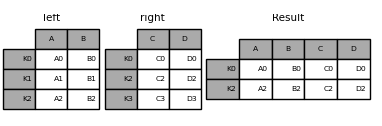

In [204]:
result = left.join(right, how="outer")

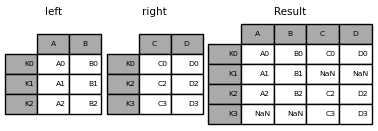

# Groupby

One of the key features of Pandas is the `gropuby` method. It allows to aggregate, combine and transform the data. We then refer to `groupby` as a process involving one or more of the following steps: 
<ul>
    <li> <b> splitting </b> data into groups based on some criteria </li>
    <li> <b> applying </b> a function to each group independently. </li>
    <li> <b> combining </b> the results into a data structure. </li>
</ul>

The main idea behind is that we can combine elements by groups, and apply a function to the elements. For example, obtain the mean strength of each Pokemon. For an extensive revision visit this [site](https://pandas.pydata.org/docs/user_guide/groupby.html).
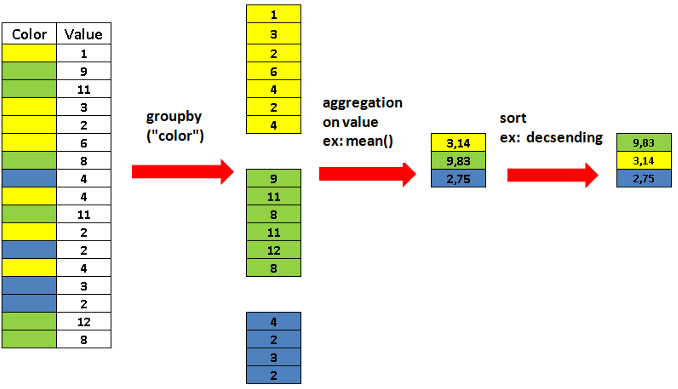

In [206]:
df = pd.read_csv('Pokemon.csv')


## Splitting objects into groups

It returns a list of tuples of each unique value on the `'Type 1'` column with the sliced `DataFrame`.

In [218]:
a = df.groupby(['Type 1'])
print(a.groups)
for i in a :
    print(i[1].head(3))

{'Bug': [13, 14, 15, 16, 17, 18, 19, 51, 52, 53, 54, 132, 136, 137, 179, 180, 181, 182, 208, 219, 220, 228, 229, 230, 231, 232, 288, 289, 290, 291, 292, 307, 308, 314, 315, 316, 342, 343, 446, 447, 457, 458, 459, 460, 461, 462, 463, 520, 600, 601, 602, 603, 604, 605, 618, 619, 649, 650, 656, 657, 677, 678, 693, 697, 698, 717, 732, 733, 734], 'Dark': [212, 213, 233, 246, 247, 248, 284, 285, 326, 327, 392, 393, 478, 512, 549, 568, 569, 620, 621, 631, 632, 685, 686, 690, 691, 694, 695, 696, 756, 757, 793], 'Dragon': [159, 160, 161, 365, 366, 406, 407, 408, 409, 417, 418, 419, 420, 425, 426, 491, 492, 493, 494, 671, 672, 673, 682, 706, 707, 710, 711, 712, 774, 775, 776, 794], 'Electric': [30, 31, 88, 89, 108, 109, 134, 146, 157, 186, 193, 194, 195, 196, 258, 262, 337, 338, 339, 340, 341, 448, 449, 450, 464, 513, 517, 531, 532, 533, 534, 535, 536, 581, 582, 648, 663, 664, 665, 704, 705, 764, 765, 772], 'Fairy': [40, 41, 187, 189, 190, 225, 226, 519, 737, 738, 739, 752, 753, 754, 755, 770, 7

## Create a new DataFrame

The most common use is when we just care about the aggregate characteristics of some groups. Similar to Stata `collapse`. The following code provides the mean of all the variables by `Type 1`.

In [220]:
dfmean = df.groupby(['Type 1']).mean()
dfmean.head(4)

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,
Bug,334.492754,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000
Dark,461.354839,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516
Dragon,474.375000,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
Electric,363.500000,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909


Similarly, we can also sum all the values:

In [221]:
dfsum  = df.groupby(['Type 1']).sum()
dfsum.head(2)

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,
Bug,23080,26146,3925,4897,4880,3717,4471,4256,222,0
Dark,14302,13818,2071,2740,2177,2314,2155,2361,125,2


Suppose we are only interested into one of the values of the `DataFrame`. For example, the average *Attack*. We could do:

In [223]:
df.groupby(['Type 1'])['Attack'].mean().head(4)

Type 1
Bug          70.971014
Dark         88.387097
Dragon      112.125000
Electric     69.090909
Name: Attack, dtype: float64

## Gropuby with multiple columns

We can also do a groupby with multiple columns.

In [226]:
df.groupby(['Type 1','Type 2'])['Attack'].mean().head(20)

Type 1  Type 2  
Bug     Electric     62.000000
        Fighting    155.000000
        Fire         72.500000
        Flying       70.142857
        Ghost        90.000000
        Grass        73.833333
        Ground       62.000000
        Poison       68.333333
        Rock         56.666667
        Steel       114.714286
        Water        30.000000
Dark    Dragon       85.000000
        Fighting     82.500000
        Fire         80.000000
        Flying       92.200000
        Ghost        80.000000
        Ice         107.500000
        Psychic      73.000000
        Steel       105.000000
Dragon  Electric    150.000000
Name: Attack, dtype: float64

It is important to mention that the index of the result dataframe are the columns that we are grouping by:

In [227]:
a = df.groupby(['Type 1','Type 2'])['Attack'].mean()
a.index

MultiIndex([(  'Bug', 'Electric'),
            (  'Bug', 'Fighting'),
            (  'Bug',     'Fire'),
            (  'Bug',   'Flying'),
            (  'Bug',    'Ghost'),
            (  'Bug',    'Grass'),
            (  'Bug',   'Ground'),
            (  'Bug',   'Poison'),
            (  'Bug',     'Rock'),
            (  'Bug',    'Steel'),
            ...
            ('Water', 'Fighting'),
            ('Water',   'Flying'),
            ('Water',    'Ghost'),
            ('Water',    'Grass'),
            ('Water',   'Ground'),
            ('Water',      'Ice'),
            ('Water',   'Poison'),
            ('Water',  'Psychic'),
            ('Water',     'Rock'),
            ('Water',    'Steel')],
           names=['Type 1', 'Type 2'], length=136)

## Aggregate multiple statistics

Until now we have just been able to obtain one new column returning the mean or the sum of the grup. However, we can obtain more than one statistic with just one groupby using the `agg()` method.

In [228]:
df.groupby(['Type 1'])['Attack'].agg(['mean','sum']).head(5)

,mean,sum
Type 1,,
Bug,70.971014,4897
Dark,88.387097,2740
Dragon,112.125000,3588
Electric,69.090909,3040
Fairy,61.529412,1046


In [229]:
# we can put the name that we want:
df.groupby(['Type 1'])['Attack'].agg(Average = ('mean'),Totalsum = ('sum')).head(5)

,Average,Totalsum
Type 1,,
Bug,70.971014,4897
Dark,88.387097,2740
Dragon,112.125000,3588
Electric,69.090909,3040
Fairy,61.529412,1046


# Apply

Pandas apply allows to apply a function along an axis of the `DataFrame`. We can apply built-in functions, our functions and lambda functions. It improves the efficiency of our code with an elegant syntaxt. 

In [232]:
# Modify the attack
df['Attack'].apply(lambda x: x*2 +1)

0       99
1      125
2      165
3      201
4      105
      ... 
795    201
796    321
797    221
798    321
799    221
Name: Attack, Length: 800, dtype: int64

In [233]:
# Create a function

def modify(x):
    
    return x*2+1

df['Attack'].apply(modify)

0       99
1      125
2      165
3      201
4      105
      ... 
795    201
796    321
797    221
798    321
799    221
Name: Attack, Length: 800, dtype: int64